# Tumour-Check Project

## Background Inspiration

In the medicinal area and healthcare industry, various tools and instruments are being used to detect tumours. At initial stage of check-up, MRIs (Magnetic resonance imaging) are widely used by medicinal practitioners to confirm presence of tumours in a patient. Upon getting the result in form of MRI image and analysing the brain anatomy, doctors will be able to diagnose any tumours that are present in the patient's brain and start treatment or any medical procedures immediately.

In the recent years, healthcare sector in Singapore is suffering from manpower shortage in healthcare staffs. Additionally, demand for healthcare staffs and nurses are projected to continue to increase. The strain on manpower is further worsened by Singapore's declining fertility rate as well as growing aging population, both of which can aggravate further societal challenges in the long-run. These issues contributes to a bottleneck in the Singapore's supply of health workers and at the same time, potentially increasing demand for healthcare services. These pose as a major concern of future insufficient supply to meet the increasing demand. With the forementioned considerations, heathcare sector would need to find ways to reinvent operations in combating the manpower shortage and one of the potential ways would be tapping into automation and AI. 

These current issues led me to thinking, if tumours are diagnosed from analysing the photo of MRI scans to look for anomalies in the anatomy of the brain, will neural networks or machine learning models be able to learn and classify on presence of tumours? With this possibility in mind, AI and machine learning can be deployed in the field of medicine to increase the efficiency.

## Assumptions

- Current practice of reviewing MRI Images are only done by senior/specialist doctors.
- Healthcare sector lack in most types of healthcare workers including doctors and nurses.
- MRI images are captured reliably by MRI machines in hospitals.
- Simplified workflow process will only involve: 1. Taking MRI images, 2. 2nd-Level Review on MRI images to verify prediction, 3. Further action/medical advice given to patients.

## Objective of Project

- To explore and program a general structure of how MRI Images can be handled in preparation for model and prediction.
- To build a predictive model that classifies whether a patient has tumour or no tumour based off MRI images.
- Explore recommendations and strategies that can improve on the workflow and productivity in the healthcare system.

# Code

In [1]:
# Libaries/Packages
import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [2]:
# loading the data set

file_tumour_no = 'brain_tumor_dataset/no/'
file_tumour_yes = 'brain_tumor_dataset/yes/'

jpg_tumour_no = os.listdir(file_tumour_no)
jpg_tumour_yes = os.listdir(file_tumour_yes)

length_tumour_no = len(os.listdir(file_tumour_no))
length_tumour_yes = len(os.listdir(file_tumour_yes))

print(length_tumour_no)
print(length_tumour_yes)

98
155


In [3]:
os.listdir(file_tumour_no)

['1 no.jpeg',
 '10 no.jpg',
 '11 no.jpg',
 '12 no.jpg',
 '13 no.jpg',
 '14 no.jpg',
 '15 no.jpg',
 '17 no.jpg',
 '18 no.jpg',
 '19 no.jpg',
 '2 no.jpeg',
 '20 no.jpg',
 '21 no.jpg',
 '22 no.jpg',
 '23 no.jpg',
 '24 no.jpg',
 '25 no.jpg',
 '26 no.jpg',
 '27 no.jpg',
 '28 no.jpg',
 '29 no.jpg',
 '3 no.jpg',
 '30 no.jpg',
 '31 no.jpg',
 '32 no.jpg',
 '33 no.jpg',
 '34 no.jpg',
 '35 no.jpg',
 '36 no.jpg',
 '37 no.jpg',
 '38 no.jpg',
 '39 no.jpg',
 '4 no.jpg',
 '40 no.jpg',
 '41 no.jpg',
 '42 no.jpg',
 '43 no.jpg',
 '44no.jpg',
 '45 no.jpg',
 '46 no.jpg',
 '47 no.jpg',
 '48 no.jpeg',
 '49 no.jpg',
 '5 no.jpg',
 '50 no.jpg',
 '6 no.jpg',
 '7 no.jpg',
 '8 no.jpg',
 '9 no.jpg',
 'N1.JPG',
 'N11.jpg',
 'N15.jpg',
 'N16.jpg',
 'N17.jpg',
 'N19.JPG',
 'N2.JPG',
 'N20.JPG',
 'N21.jpg',
 'N22.JPG',
 'N26.JPG',
 'N3.jpg',
 'N5.jpg',
 'N6.jpg',
 'no 1.jpg',
 'no 10.jpg',
 'no 100.jpg',
 'no 2.jpg',
 'no 3.jpg',
 'no 4.jpg',
 'no 5.jpeg',
 'no 6.jpg',
 'no 7.jpeg',
 'no 8.jpg',
 'no 89.jpg',
 'no 9.pn

In [4]:
def give_random_image(num, tumour):
    """Returns a list of specified number of random images based on tumour or non-tumour along with their label"""
    if not isinstance(tumour, bool):
        raise ValueError("Argument must contain a boolean value (True or False)")
    if tumour == True:
        length_tumour_yes = len(os.listdir(file_tumour_yes))
        sample_tumour_yes = np.random.choice(length_tumour_yes, size = num,replace = False)
        random_image = [img_to_array(load_img(file_tumour_yes + jpg_tumour_yes[i], target_size=(128, 128))) for i in sample_tumour_yes]
        labels = np.ones(num)
    else:
        length_tumour_no = len(os.listdir(file_tumour_no))
        sample_tumour_no = list(np.random.choice(length_tumour_no, size = num,replace = False))
        random_image = [img_to_array(load_img(file_tumour_no + jpg_tumour_no[i], target_size=(128, 128))) for i in sample_tumour_no]
        labels = np.zeros(num)
    random_image = np.array(random_image) / 255.0
        
    return random_image, labels

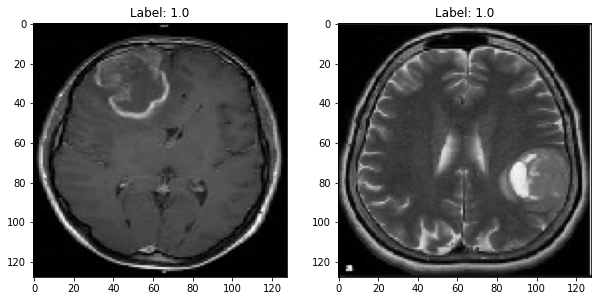

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))
tumours, label = give_random_image(2, tumour = True)

for i in range(2):
    axes[i].imshow(tumours[i])
    axes[i].set_title(f'Label: {label[i]}')

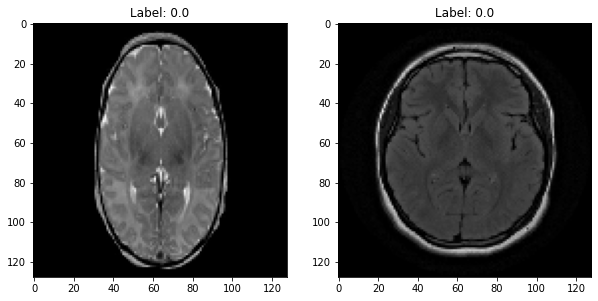

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))
tumours, label = give_random_image(2, tumour = False)

for i in range(2):
    axes[i].imshow(tumours[i])
    axes[i].set_title(f'Label: {label[i]}')

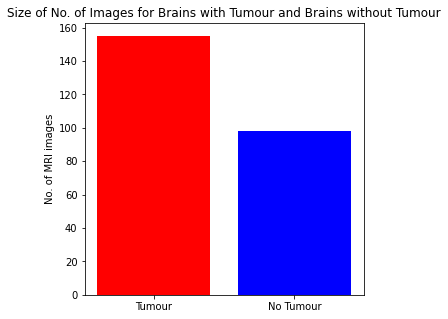

In [7]:
plt.figure(figsize=(5,5))
plt.bar(["Tumour", "No Tumour"], height=[length_tumour_yes, length_tumour_no], color = ['red','blue'])
plt.title('Size of No. of Images for Brains with Tumour and Brains without Tumour')
plt.ylabel('No. of MRI images')
plt.show()

## Preprocessing Data and Data Pipeline

In [8]:
# Create directories for training and test images
os.makedirs('processed_data/train/yes/', exist_ok = True)
os.makedirs('processed_data/train/no/', exist_ok = True)
os.makedirs('processed_data/test/yes/', exist_ok = True)
os.makedirs('processed_data/test/no/', exist_ok = True)

In [9]:
# Randomly shuffle the images
np.random.shuffle(jpg_tumour_yes)
np.random.shuffle(jpg_tumour_no)

#Splitting index
split_index_tumour = int(0.85*len(jpg_tumour_yes))
split_index_no_tumour = int(0.85*len(jpg_tumour_no))

print(split_index_tumour)
print(split_index_no_tumour)

131
83


In [10]:
#Split images to training and test sets at a 85-15 split.
tumour_train, tumour_test = jpg_tumour_yes[:split_index_tumour], jpg_tumour_yes[split_index_tumour:]
no_tumour_train, no_tumour_test = jpg_tumour_no[:split_index_no_tumour], jpg_tumour_no[split_index_no_tumour:]

print(len(tumour_train))
print(len(tumour_test))
print(len(no_tumour_train))
print(len(no_tumour_test))

131
24
83
15


In [11]:
# Quality check
# duplicates = []
# for i in tumour_train:
#     for n in tumour_test:
#         if i == n:
#             duplicate.append(i)
#             continue
# print(duplicates)

In [12]:
def remove_images(directory):
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

In [13]:
# Clear images in the train and test folders.
remove_images('processed_data/train/yes/')
remove_images('processed_data/train/no/')
remove_images('processed_data/test/yes/')
remove_images('processed_data/test/no/')


#Copy images over to training and testing folders.
for image in tumour_train:
    shutil.copy(file_tumour_yes + image,'processed_data/train/yes/' + image)
    
for image in tumour_test:
    shutil.copy(file_tumour_yes + image,'processed_data/test/yes/' + image)

for image in no_tumour_train:
    shutil.copy(file_tumour_no + image,'processed_data/train/no/' + image)
    
for image in no_tumour_test:
    shutil.copy(file_tumour_no + image,'processed_data/test/no/' + image)

In [14]:
def augmented_image_generator(validation_split=0.0):
    return ImageDataGenerator(rescale = (1/255.0),
                              rotation_range = 20,
                              fill_mode = "nearest",
                              validation_split = validation_split,
                              horizontal_flip = True,
                              vertical_flip = True,
                              brightness_range = [0.9, 1.1],
                              zoom_range=0.05)

def test_image_generator():
    return ImageDataGenerator(rescale = (1/255.0))

In [15]:
#get objects of image generator for MRI images
augmented_image_generator = augmented_image_generator(validation_split = 0.15)
test_image_generator = test_image_generator()

In [16]:
mri_batch_size = 15

In [17]:
def get_generator(image_data_generator, directory, subset=None, seed = None):
    """Subset to indicate training or validation"""
    image_data_generator = image_data_generator.flow_from_directory(directory, target_size = (128,128),
                                                                    batch_size = mri_batch_size, class_mode = 'binary',
                                                                    shuffle = True, subset = subset ,
                                                                    seed = seed)
    
    return image_data_generator

In [18]:
train_mri_generator = get_generator(augmented_image_generator, directory = 'processed_data/train/' , subset = 'training')
valid_mri_generator = get_generator(augmented_image_generator, directory = 'processed_data/train/' , subset = 'validation')
test_mri_generator = get_generator(test_image_generator, directory = 'processed_data/test/')

Found 183 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


(15, 128, 128, 3)
(15,)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]] 1.0


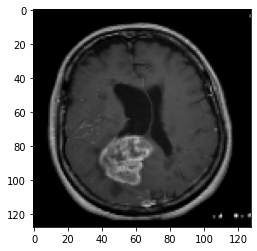

In [19]:
images, labels = next(train_mri_generator)
print(images.shape)
print(labels.shape)
print(images[0], labels[0])

plt.imshow(images[0])
plt.show()

In [20]:
#Reset train_mri_generator
train_mri_generator = get_generator(augmented_image_generator, directory = 'processed_data/train/' , subset = 'training')


Found 183 images belonging to 2 classes.


## Modelling

In [21]:
def cnn_early_stopping():
    return tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience = 5)

In [22]:
def cnn_best_checkpoint():
    best_checkpoint = 'mri_cnn_model/checkpoint'
    best_checkpoint = ModelCheckpoint(filepath = best_checkpoint,
                                      save_freq = 'epoch',
                                      monitor = 'val_binary_accuracy',
                                      save_best_only = True,
                                      verbose = 1)
    return best_checkpoint

In [23]:
def get_test_accuracy(model, test_generator):
    test_loss, test_acc, recall = model.evaluate(test_generator, verbose = 1)
    print('Test Loss: {loss:0.3f}\nTest Accuracy: {acc:0.3f}\nTest Recall: {recall:0.3f}'.format(loss = test_loss, acc = test_acc, recall=recall))

In [24]:
cnn_callbacks = [cnn_early_stopping(), cnn_best_checkpoint()]

In [25]:
def get_cnn_model(input_shape):
    model = Sequential([
        Conv2D(64, (3,3), strides = 1, activation = 'relu', padding = 'same', input_shape = input_shape, name = 'conv2d_1'),
        MaxPooling2D((2,2), name = 'maxpool2d_1', padding = 'same'),
        BatchNormalization(name = 'batchnorm_1'),
        Conv2D(128, (3,3), strides = 1, activation = 'relu', padding = 'same', input_shape = input_shape, name = 'conv2d_2'),
        MaxPooling2D((2,2), name = 'maxpool2d_2', padding = 'same'),
        Conv2D(128, (2,2), strides = 1, activation = 'relu', padding = 'same', input_shape = input_shape, name = 'conv2d_3'),
        MaxPooling2D((2,2), name = 'maxpool2d_3', padding = 'same'),
        Conv2D(256, (2,2), strides = 1, activation = 'relu', padding = 'same', input_shape = input_shape, name = 'conv2d_4'),
        MaxPooling2D((2,2), name = 'maxpool2d_4', padding = 'same'),
        Flatten(name = 'flatten_1'),
        Dense(256, activation = 'relu', name = 'dense_1'),
        Dense(128, activation = 'relu', name = 'dense_2'),
        Dense(1, activation = 'sigmoid', name = 'sigmoid_1')
    ])
    model.compile(tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'binary_crossentropy', 
                  metrics = ['binary_accuracy', 'Recall'])
    return model


In [26]:
cnn_model = get_cnn_model((128,128,3))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 64, 64, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       65664     
                                                        

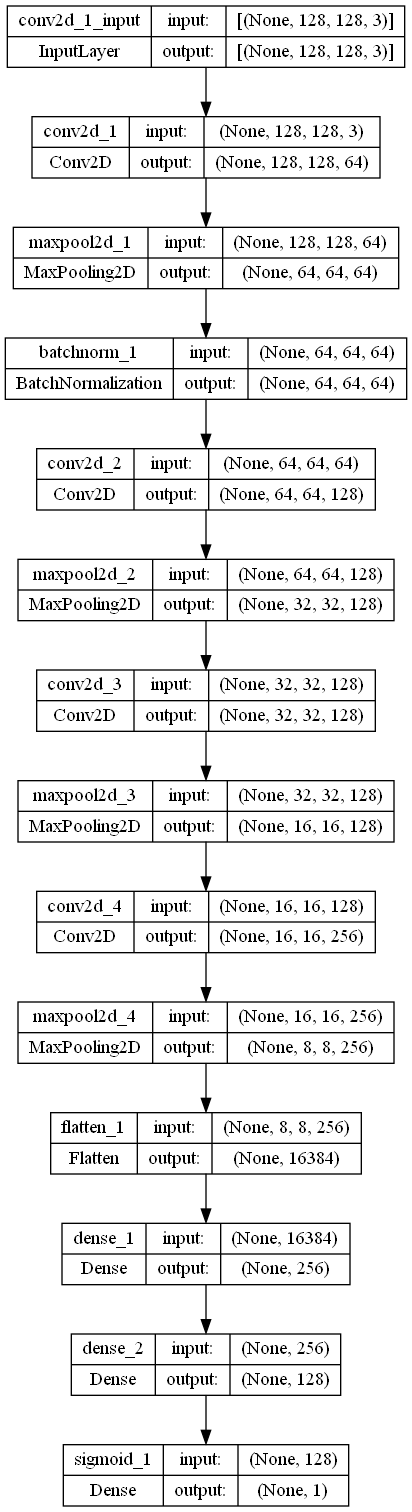

In [27]:
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
Image(filename='cnn_model.png') 

In [28]:
history = cnn_model.fit(train_mri_generator, validation_data = valid_mri_generator,
                        epochs = 30, steps_per_epoch=len(train_mri_generator), callbacks = cnn_callbacks)

Epoch 1/30
13/13 [==============================] - ETA: 0s - loss: 0.6894 - binary_accuracy: 0.5628 - recall: 0.8929
Epoch 1: val_binary_accuracy improved from -inf to 0.61290, saving model to mri_cnn_model\checkpoint


INFO:tensorflow:Assets written to: mri_cnn_model\checkpoint\assets


INFO:tensorflow:Assets written to: mri_cnn_model\checkpoint\assets


13/13 [==============================] - 11s 788ms/step - loss: 0.6894 - binary_accuracy: 0.5628 - recall: 0.8929 - val_loss: 0.6795 - val_binary_accuracy: 0.6129 - val_recall: 1.0000
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 0.6075 - binary_accuracy: 0.6831 - recall: 1.0000
Epoch 2: val_binary_accuracy improved from 0.61290 to 0.74194, saving model to mri_cnn_model\checkpoint


INFO:tensorflow:Assets written to: mri_cnn_model\checkpoint\assets


INFO:tensorflow:Assets written to: mri_cnn_model\checkpoint\assets


13/13 [==============================] - 7s 571ms/step - loss: 0.6075 - binary_accuracy: 0.6831 - recall: 1.0000 - val_loss: 0.6796 - val_binary_accuracy: 0.7419 - val_recall: 0.8421
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 0.5887 - binary_accuracy: 0.7541 - recall: 0.9018
Epoch 3: val_binary_accuracy did not improve from 0.74194
13/13 [==============================] - 7s 509ms/step - loss: 0.5887 - binary_accuracy: 0.7541 - recall: 0.9018 - val_loss: 0.6704 - val_binary_accuracy: 0.7419 - val_recall: 0.8421
Epoch 4/30
13/13 [==============================] - ETA: 0s - loss: 0.5534 - binary_accuracy: 0.7486 - recall: 0.8482
Epoch 4: val_binary_accuracy did not improve from 0.74194
13/13 [==============================] - 6s 442ms/step - loss: 0.5534 - binary_accuracy: 0.7486 - recall: 0.8482 - val_loss: 0.6685 - val_binary_accuracy: 0.7419 - val_recall: 0.7895
Epoch 5/30
13/13 [==============================] - ETA: 0s - loss: 0.5475 - binary_accuracy: 0.776

INFO:tensorflow:Assets written to: mri_cnn_model\checkpoint\assets


INFO:tensorflow:Assets written to: mri_cnn_model\checkpoint\assets


13/13 [==============================] - 8s 604ms/step - loss: 0.5475 - binary_accuracy: 0.7760 - recall: 0.9286 - val_loss: 0.6611 - val_binary_accuracy: 0.8065 - val_recall: 0.8947
Epoch 6/30
13/13 [==============================] - ETA: 0s - loss: 0.5191 - binary_accuracy: 0.7869 - recall: 0.9018
Epoch 6: val_binary_accuracy did not improve from 0.80645
13/13 [==============================] - 6s 453ms/step - loss: 0.5191 - binary_accuracy: 0.7869 - recall: 0.9018 - val_loss: 0.6596 - val_binary_accuracy: 0.7419 - val_recall: 0.7895
Epoch 7/30
13/13 [==============================] - ETA: 0s - loss: 0.5144 - binary_accuracy: 0.7432 - recall: 0.7857
Epoch 7: val_binary_accuracy did not improve from 0.80645
13/13 [==============================] - 6s 453ms/step - loss: 0.5144 - binary_accuracy: 0.7432 - recall: 0.7857 - val_loss: 0.6505 - val_binary_accuracy: 0.7742 - val_recall: 0.8421
Epoch 8/30
13/13 [==============================] - ETA: 0s - loss: 0.5156 - binary_accuracy: 0.754

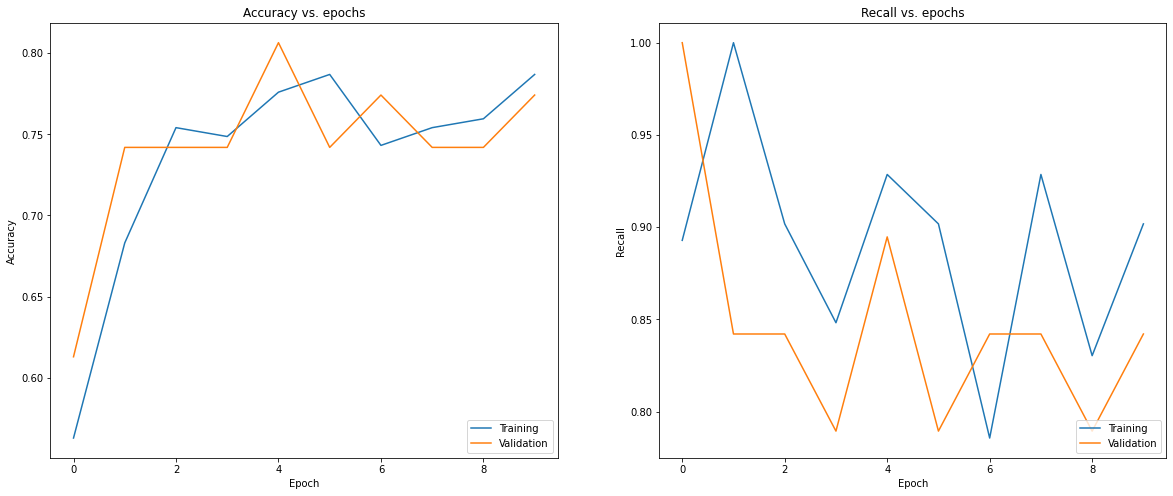

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))

axes[0].plot(history.history['binary_accuracy'])
axes[0].plot(history.history['val_binary_accuracy'])

axes[0].set_title('Accuracy vs. epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='lower right')

axes[1].plot(history.history['recall'])
axes[1].plot(history.history['val_recall'])
axes[1].set_title('Recall vs. epochs')
axes[1].set_ylabel('Recall')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='lower right')
plt.show()


## Testing Model

In [30]:
get_test_accuracy(cnn_model, test_mri_generator)

3/3 [==============================] - 0s 126ms/step - loss: 0.6084 - binary_accuracy: 0.8205 - recall: 1.0000
Test Loss: 0.608
Test Accuracy: 0.821
Test Recall: 1.000


1/1 [==============================] - 0s 34ms/step


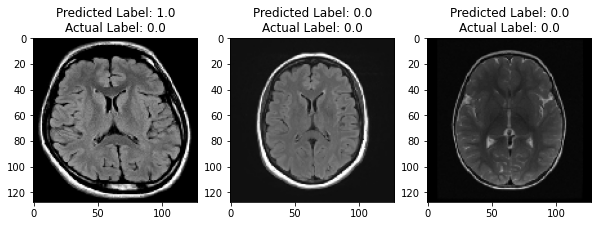

In [31]:
fig, axes = plt.subplots(1, 3, figsize = (10,10))
tumours_1, label_1 = give_random_image(3, tumour = False)
predicted_labels_1 = [1.0 if cnn_model.predict(tumour.reshape((1,) + tumour.shape))[0][0] > 0.5 else 0.0 for tumour in tumours_1]

for i in range(3):
    axes[i].imshow(tumours_1[i])
    axes[i].set_title(f'Predicted Label: {predicted_labels_1[i]}\nActual Label: {label_1[i]}')

1/1 [==============================] - 0s 112ms/step


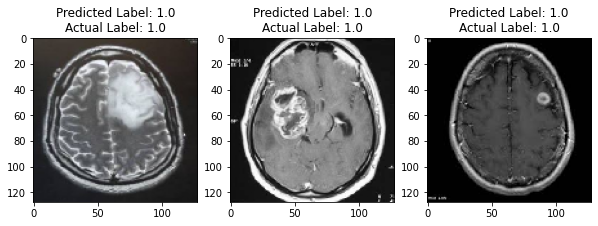

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (10,10))
tumours_2, label_2 = give_random_image(3, tumour = True)
predicted_labels_2 = [1.0 if cnn_model.predict(tumour.reshape((1,) + tumour.shape))[0][0] > 0.5 else 0.0 for tumour in tumours_2]

for i in range(3):
    axes[i].imshow(tumours_2[i])
    axes[i].set_title(f'Predicted Label: {predicted_labels_2[i]}\nActual Label: {label_2[i]}')

## Results of Model

The model seems to be able to achieve accuracy rate that fluctuates between 75% to 87%, and no further reasonable changes to model will be able to improve the performance of the model. However, in the case of tumour detection, one of the most important measure would be the metrics of Recall. Recall is the number of True Positives divided by sum of True Positives and False Negatives, which indicates to us the model's ability in correctly identifying the positive class of interest. In the case of tumour detection, the most detrimental form of inaccurate prediction would be False Negatives, causing highest social and economical consequences if patient is predicted to have no tumour, but in fact, he has a tumour.

## Notes from Model Building Process

<b>Conv2D Layer</b>
- The layers of Convolutional layers are given more filters as layer number increases since the initial layers will learn and scan lower level features such as the edges of the MRI images, and slowly learning the complex features as it goes down the layers. More complex features will require higher emphasis with more filters 
- 3x3 kernel size is being used for first 2 layers that will capture wider and more general details of simpler features while complex features are scrutinised further with the usage of 2x2 kernel size.

<b>Batch Normalisation</b>
- Usage of batch normalisation for more than 1 layers has shown to cause model to learn poorer, leading to worse performance.

<b>Learning Rate</b>
- Learning rate that are higher or lower than 0.00001 will impair the performance of the model.

<b>Regularisation and Dropout Layers</b>
- Using kernel regularisation at L1/L2 or dropout layers in different parts of the model seems to not improve the model very much despite being techniques to improve model's ability to generalise to unseen data.

<b>Data Augmentation</b>
- Different Data Augmentation techniques are used in the data pipeline as programmed in the image_generator function, such as vertical and horizontal flipping. These techniques are used to let the model train on more variations of MRI image, allowing the model to be more robust in prediction of brain tumour.

### Overall Recommendations

<b>Re-training the model with more data</b>

Even though the test accuracy of the model is lower than 90%, there is still room for increasing the accuracy of the model further. Only 255 MRI images are used in training the tumour-prediction model, and more data can be collected in the future to train the model again with goal of achieving higher accuracy results.

<b>Recommendation to improve workflow of healthcare system</b>

It is well noted that despite having more than 90% of recall rate, the minor percentage chance of getting a False Negative will still be a detrimental consequence, especially on the hospital's reputation and possibility causing legal implications. Hence, hospitals should not be using the Tumour-Prediction model to make the final determination if a patient is classified with tumours or patients classified with no tumours. 

Instead, it should act as a first-layer classification check to improve the efficiency of the system and optimise the limited resources of senior/specialist doctors and junior doctors. Tumour-classified patients can be assigned to specialist/senior doctors, and upon second-level review to validate on the prediction. Thereafter, any misclassified patients can be referred to junior doctors to examine for other cause of their health concern, while the patients with presence of tumour will be given opinion on the next steps moving forward. As for the No-Tumour patients, they will be allocated to the junior doctors for second-level review to validate on prediction. After which, patients determined to be wrongly classified and indeed has tumour, will be redirected to the senior/specialist doctors whereas the patients predicted to have no tumours correctly will be given the further appropriate medical examinations by the junior doctors.

This recommendation can provide an alternative solution in combating the manpower shortage in the healthcare sector in Singapore by utilising the pool of senior and junior doctors more effectively. Rather than assigning most patients directly to senior doctors, we can optimise the resources and improve the whole workflow. By deploying the Tumour prediction model to classify patients and involvement junior doctors in second-level review, it relieve a certain level of burdence on the senior/specialist doctors of performing the classification on their own.

# References

1. https://www.businesstimes.com.sg/singapore/economy-policy/24000-more-nurses-healthcare-staff-needed-2030-spore-ages